In [28]:
import numpy as np
import h5py
import pandas as pd

from vidmapy.kurucz.atlas import Atlas
from vidmapy.kurucz.synthe import Synthe
from vidmapy.kurucz.parameters import Parameters
import multiprocessing as mp

%matplotlib notebook

In [29]:
p= Parameters(wave_min=3000, 
              wave_max=7000, 
              resolution=300000,
              teff=17300,
              logg=4.27,
              metallicity=0.0,
              microturbulence=2.
             )

atlas_worker= Atlas()
model_primary= atlas_worker.get_model(p)

synthe_worker= Synthe()
spectrum_primary = synthe_worker.get_spectrum(model_primary, parameters=p, quiet=True)

<IPython.core.display.Javascript object>


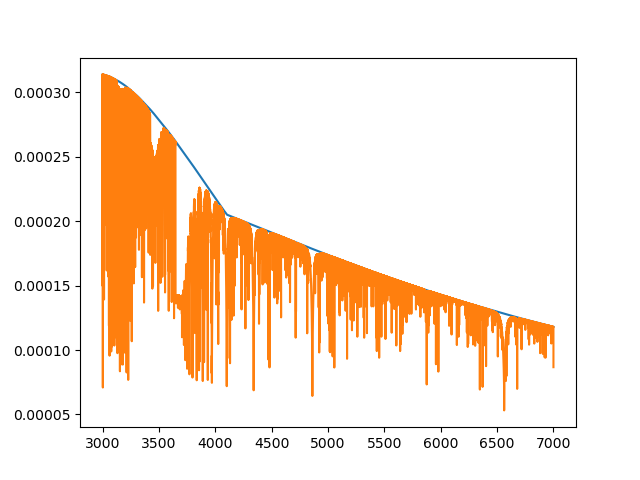

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(spectrum_primary.wave,spectrum_primary.flux/spectrum_primary.normed_flux)
plt.plot(spectrum_primary.wave,spectrum_primary.flux)

In [31]:
p= Parameters(wave_min=3000, 
              wave_max=7000, 
              resolution=300000,
              teff=15400,
              logg=4.27,
              metallicity=0.0,
              microturbulence=2.
             )

atlas_worker= Atlas()
model_secondary= atlas_worker.get_model(p)

synthe_worker= Synthe()
spectrum_secondary = synthe_worker.get_spectrum(model_secondary, parameters=p, quiet=True)

<IPython.core.display.Javascript object>


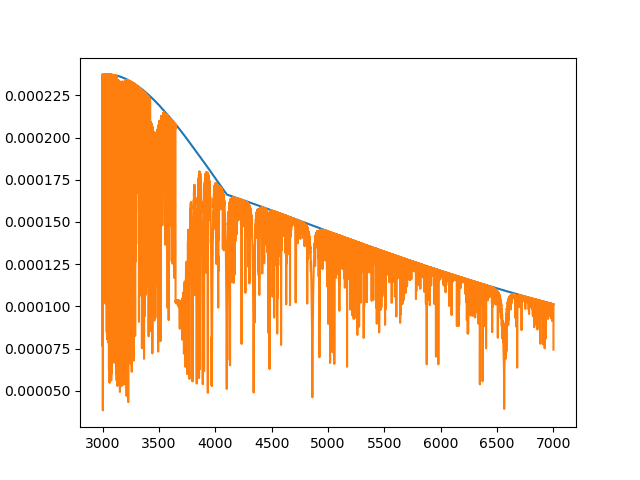

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(spectrum_secondary.wave,spectrum_secondary.flux/spectrum_secondary.normed_flux)
plt.plot(spectrum_secondary.wave,spectrum_secondary.flux)

<IPython.core.display.Javascript object>


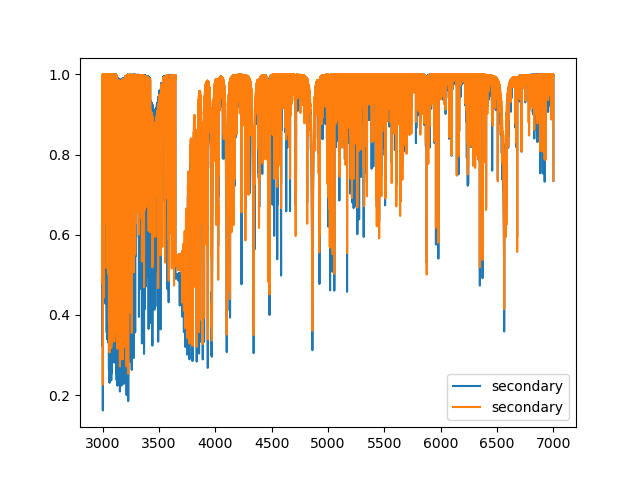

In [33]:
plt.figure()
plt.plot(spectrum_secondary.wave,spectrum_secondary.normed_flux,label="secondary")
plt.plot(spectrum_primary.wave,spectrum_primary.normed_flux,label="secondary")

plt.legend()

In [34]:
def save_spec(s, filename):
    df = pd.DataFrame({"wave":s.wave,
                       "flux":s.flux,
                       "normed_flux":s.normed_flux})
    df.to_csv(filename,index=None,sep=" ")
    
save_spec(spectrum_secondary, "spectrum_secondary.csv")
save_spec(spectrum_primary, "spectrum_primary.csv")